<a href="https://colab.research.google.com/github/kobi-2/IUT-Lab-NumMethod/blob/main/170041013_Lab03_NumMethodLab_MyCopy.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Lab03 - Group 1

Task: Implementing Non Linear Polynomial Regression for the order of n. 

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

### Defining function for Non-Linear Polynomial:

In [ ]:
def nonLinearPolynomialCoefficient(t, alpha, order=2):
    n = len(t)
    a = np.zeros((order+1, order+1))
    b = np.zeros((order+1, 1))

    for i in range(order+1):
        for j in range(order+1):
            a[i][j] = np.sum(np.power(t, i+j))
    a[0][0] = n

    for i in range(order+1):
        b[i][0] = np.sum(np.power(t, i) * alpha)
    
    result = np.matmul(np.linalg.inv(a), b)
    # print(result)
    return result

### Input: 

In [ ]:
t = np.array([80, 40, -40, -120, -200, -280, -340])
alpha = np.array([6.47e-6, 6.24e-6, 5.72e-6, 5.09e-6, 4.30e-6, 3.33e-6, 2.45e-6])

### Calling function to calculate Coeffticient and printing out the result: 

In [ ]:
#@title Define order
order =  15#@param {type:"number"}

coeff_result = nonLinearPolynomialCoefficient(t,alpha, order)
print("coefficient result: \n", coeff_result)

coefficient result: 
 [[-2.07071189e-05]
 [-4.27823981e-05]
 [-5.02926634e-05]
 [-1.90487791e-05]
 [-1.68081539e-05]
 [-8.10551503e-06]
 [-1.91057537e-05]
 [-1.78757129e-05]
 [-1.43589725e-05]
 [-1.82506845e-05]
 [-1.23526777e-05]
 [ 2.47368800e-06]
 [ 6.86457659e-07]
 [-2.46691854e-06]
 [-9.12083489e-06]
 [-9.02672275e-06]]


### Printing the Nonlinear Polynomial Expression: 

In [ ]:
print('The expression for the Nonlinear Polyomial Regression is: \n')
for i in range(len(coeff_result)):
  if i == 0:
    print(coeff_result[i,0])
  else:
    print(' + ', coeff_result[i,0], '* t ^ ', i)


The expression for the Nonlinear Polyomial Regression is: 

-2.0707118885483045e-05
 +  -4.278239809604396e-05 * t ^  1
 +  -5.0292663390343756e-05 * t ^  2
 +  -1.9048779104953866e-05 * t ^  3
 +  -1.6808153901144523e-05 * t ^  4
 +  -8.105515032837556e-06 * t ^  5
 +  -1.9105753678333712e-05 * t ^  6
 +  -1.7875712879886647e-05 * t ^  7
 +  -1.43589725146658e-05 * t ^  8
 +  -1.8250684549921004e-05 * t ^  9
 +  -1.2352677731013006e-05 * t ^  10
 +  2.4736880029716633e-06 * t ^  11
 +  6.864576585199811e-07 * t ^  12
 +  -2.4669185401092215e-06 * t ^  13
 +  -9.120834892600112e-06 * t ^  14
 +  -9.026722748679367e-06 * t ^  15


### Function for calculating value with Nonlinear Regression, given coefficient and single input T: 

In [ ]:
def nonLinearPolynomialApprox(coefficient, t=80):
  coeff = np.array(coefficient)
  len_coeff = len(coefficient)
  
  # print('len of coeff: ', len_coeff)
  # print(coeff)

  t_new = np.ones((len_coeff,1))
  for i in range (len_coeff):
    t_new[i][0] = np.power(t,i)

  # print('len of t_new: ', len(t_new))
  # print(t_new)

  # print(coeff*t_new)
  return np.sum(coeff*t_new)


In [ ]:
#@title Input T to calculate Nonlinear Regression Approximation:  
param_t = 80 #@param {type:"number"}

apprx_result = nonLinearPolynomialApprox(coeff_result, param_t)
print('The approximated result with Nonlinear Regression model for order =', order , 'and given input t =', param_t, '  is:', apprx_result)

The approximated result with Nonlinear Regression model for order = 15 and given input t = 80   is: 112784223147778.47


### Calculating Nonlinear Polynomial for all T: 

In [ ]:
nonLinearPol_results = np.zeros((len(t),1))
t_temp = np.array(t)
for i in range(len(t)):
  nonLinearPol_results[i][0] = nonLinearPolynomialApprox(coeff_result, t_temp[i])

print(nonLinearPol_results)

[[ 1.12784223e+14]
 [ 6.71307462e+12]
 [-7.37117604e+13]
 [ 2.04786000e+14]
 [-1.11919614e+14]
 [ 7.70588346e+13]
 [ 1.35065312e+14]]


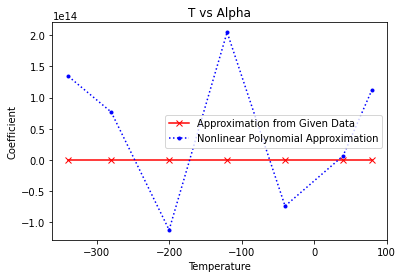

In [ ]:
plt.plot(t, alpha, label='Approximation from Given Data', color='r', marker='x', linestyle='-')
plt.plot(t,nonLinearPol_results, label = 'Nonlinear Polynomial Approximation', color='b', marker='.', linestyle=':')
plt.title('T vs Alpha')
plt.xlabel('Temperature')
plt.ylabel('Coefficient')
plt.legend()
plt.show()